# **Amazon Prime TV Shows and Movies EDA**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary**

This project performs an exploratory data analysis (EDA) on Amazon Prime Video’s content catalog using two primary datasets: one containing details about titles (movies and TV shows) and another containing credits (cast and crew information). The analysis focuses on understanding the structure, quality, and completeness of the data, setting the stage for deeper investigation into content trends, genre distribution, ratings, release patterns, and regional availability.

**Key steps**:

**Data Collection and Loading**: Two datasets were loaded:

titles.csv with 9,871 entries and 15 columns.

credits.csv with 124,235 entries and 5 columns.

**Initial Data Inspection**: A preliminary view of the datasets revealed:

The titles dataset includes fields such as id, title, type, description, release_year, age_certification, runtime, genres, production_countries, seasons, imdb_id, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score.

The credits dataset contains person_id, id, name, character, and role.

**Data Quality Assessment**:

* Duplicates: 3 duplicate rows were found in the titles dataset and 56 in the credits dataset.

* Missing Values:

  *Titles dataset*: Significant missing values were observed in age_certification (6,487 missing), seasons (8,514 missing), tmdb_score (2,082 missing), imdb_score (1,021 missing), and imdb_votes (1,031 missing).

  *Credits dataset*: The character column has 16,287 missing entries.

A heatmap visualization was used to visually assess the distribution of missing data across both datasets.

**Data Wrangling**: Dataset is prepared for analysis by removing the duplicates, taking care of identified missing values and performing other necessary operations.

**Data Visualization through Charts**: Different charts are used to visually identify trends and provide a more intuitive way for deriving insights regarding content trends, popularity, and regional distribution on Amazon Prime Video and finalizing strategies.



# **GitHub Link**

[Amazon Prime TV Shows and Movies EDA](https://github.com/Akashdeep2696/Amazon-Prime-TV-Shows-and-Movies-EDA.git)

# **Problem Statement**


This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

* **Content Diversity**: What genres and categories dominate the platform?
* **Regional Availability**: How does content distribution vary across different regions?
* **Trends Over Time**: How has Amazon Prime's content library evolved?
* **IMDb Ratings & Popularity**: What are the highest-rated or most popular shows on the platform?


By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

#### **Define Your Business Objective?**

The primary business objective is to utilize the provided dataset to optimize content acquisition and curation strategies for Amazon Prime Video. Specific goals based on the available data include:

**Content Valuation**: Correlate tmdb_popularity and imdb_score with genres and runtime to identify which content characteristics drive the highest user engagement.

**Regional Strategy**: Analyze the production_countries column to determine high-performing geographic regions and identify under-represented markets with high potential.

**Catalog Balance**: Assess the ratio of Movies (entries with null seasons) to TV Shows (entries with valid seasons) to determine if the platform needs to balance its library type.

**Quality Assurance**: Use data completeness metrics (e.g., missing age_certification) to flag content that requires metadata enrichment to improve discoverability and parental controls.

## ***1. Know Your Data***

### Import Libraries

In [86]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast  # For safe evaluation of string lists
%matplotlib inline

# For modularity, I have defined a function to load data
def load_datasets():
    titles = pd.read_csv('titles.csv')
    credits = pd.read_csv('credits.csv')
    return titles, credits

### Dataset Loading

In [87]:
# Load Dataset
try:
    titles, credits = load_datasets()
except FileNotFoundError:
    print("Dataset files not found. Please ensure 'titles.csv' and 'credits.csv' are in the current directory.")

### Dataset First View

In [88]:
# Dataset First Look
print("Titles Dataset Head:")
display(titles.head())
print("\nCredits Dataset Head:")
display(credits.head())

Titles Dataset Head:


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6



Credits Dataset Head:


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [89]:
# Dataset Rows & Columns count
print(f"Titles shape: {titles.shape}")
print(f"Credits shape: {credits.shape}")

Titles shape: (9871, 15)
Credits shape: (124235, 5)


### Dataset Information

In [90]:
# Dataset Info
print("Titles Info:")
titles.info()
print("\nCredits Info:")
credits.info()

Titles Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float

#### Duplicate Values

In [91]:
# Dataset Duplicate Value Count
print(f"Duplicates in Titles: {titles.duplicated().sum()}")
print(f"Duplicates in Credits: {credits.duplicated().sum()}")

Duplicates in Titles: 3
Duplicates in Credits: 56


#### Missing Values/Null Values

In [92]:
# Missing Values/Null Values
print("Missing Values in Titles:")
display(titles.isnull().sum())
print("\nMissing Values in Credits:")
display(credits.isnull().sum())

Missing Values in Titles:


,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514



Missing Values in Credits:


,0
person_id,0
id,0
name,0
character,16287
role,0


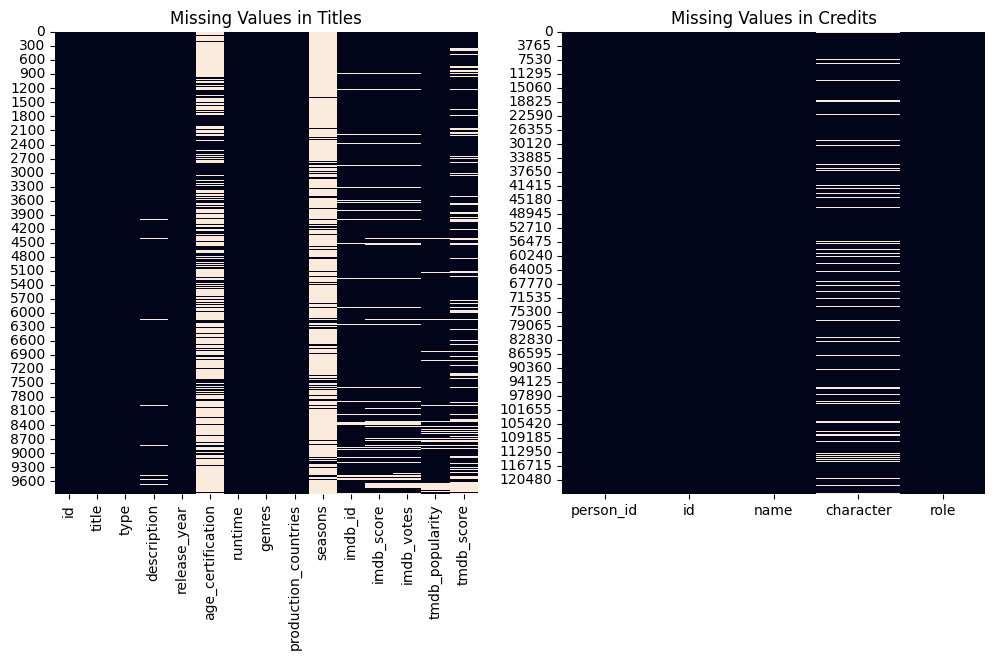

In [93]:
# Visualizing the missing values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(titles.isnull(), cbar=False, ax=ax[0])
ax[0].set_title('Missing Values in Titles')
sns.heatmap(credits.isnull(), cbar=False, ax=ax[1])
ax[1].set_title('Missing Values in Credits')
plt.show()

### What did you know about your dataset?

The titles dataset (9,871 rows, 15 columns) features a mix of categorical (e.g., genres as lists) and numeric (e.g., IMDb scores) variables, with notable missing values in age_certification, seasons, and IMDb metrics. The credits dataset (124,235 rows, 5 columns) links persons to titles, with some missing character names. Duplicates were minimal (3 in titles, 56 in credits).

## ***2. Understanding Your Variables***

In [94]:
# Dataset Columns
print("Titles Columns:", titles.columns.tolist())
print("Credits Columns:", credits.columns.tolist())

Titles Columns: ['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
Credits Columns: ['person_id', 'id', 'name', 'character', 'role']


In [95]:
# Dataset Describe
# Numerical statistics from Titles
print("\nTitles Dataset - Numerical Columns Statistics:")
display(titles.describe())

# Categorical statistics from Titles
print("\nTitles Dataset - Categorical Columns Statistics:")
for col in titles.columns:
    print(f"\n{col}:")
    print(f"Unique values: {titles[col].nunique()}")
    print(f"Top 5 values:\n{titles[col].value_counts().head()}")
    print(f"-"*30)

# Categorical statistics from Credits
print("\nCredits Dataset - Categorical Columns Statistics:")
for col in credits.columns:
    print(f"\n{col}:")
    print(f"Unique values: {credits[col].nunique()}")
    print(f"Top 5 values:\n{credits[col].value_counts().head()}")
    print(f"-"*30)


Titles Dataset - Numerical Columns Statistics:


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000



Titles Dataset - Categorical Columns Statistics:

id:
Unique values: 9868
Top 5 values:
id
tm89134     2
tm66674     2
tm137955    2
tm439837    1
tm354590    1
Name: count, dtype: int64
------------------------------

title:
Unique values: 9737
Top 5 values:
title
The Lost World                   3
Little Men                       3
Dynamite                         3
The Hound of the Baskervilles    3
Cinderella                       3
Name: count, dtype: int64
------------------------------

type:
Unique values: 2
Top 5 values:
type
MOVIE    8514
SHOW     1357
Name: count, dtype: int64
------------------------------

description:
Unique values: 9734
Top 5 values:
description
No overview found.                                                                                                                                                               5
Add a Plot »                                                                                                                          

### Variables Description

For Titles:
* **id**: Unique ID from JustWatch (string).
* **title**: Title name (string).
* **type**: 'MOVIE' or 'SHOW' (string).
* **description**: Brief summary (string).
* **release_year**: Year released (int).
* **age_certification**: Age rating (string, e.g., 'PG').
* **runtime**: Duration in minutes (int).
* **genres**: List of genres (string list).
* **production_countries**: List of producing countries (string list).
* **seasons**: Number of seasons for shows (float, NaN for movies).
* **imdb_id**: IMDb ID (string).
* **imdb_score**: IMDb rating (float).
* **imdb_votes**: IMDb votes count (float).
* **tmdb_popularity**: TMDB popularity (float).
* **tmdb_score**: TMDB rating (float).

For Credits:
* **person_id**: Unique person ID (int).
* **id**: Title ID (string).
* **name**: Name of actor/director (string).
* **character**: Character name (string, for actors).
* **role**: 'ACTOR' or 'DIRECTOR' (string).

### Check Unique Values for each variable.

In [96]:
# Check Unique Values for each variable.
for col in titles.columns:
    print(f"Unique values in {col} (Titles): {titles[col].nunique()}")
    print(titles[col].unique()[:5])  # First 5 for brevity

for col in credits.columns:
    print(f"Unique values in {col} (Credits): {credits[col].nunique()}")
    print(credits[col].unique()[:5])  # First 5 for brevity

Unique values in id (Titles): 9868
['ts20945' 'tm19248' 'tm82253' 'tm83884' 'tm56584']
Unique values in title (Titles): 9737
['The Three Stooges' 'The General' 'The Best Years of Our Lives'
 'His Girl Friday' 'In a Lonely Place']
Unique values in type (Titles): 2
['SHOW' 'MOVIE']
Unique values in description (Titles): 9734
["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America’s Civil War, Union spies steal engineer Johnnie Gray's beloved locomotive, 'The General'—with Johnnie's lady love aboard an a

## 3. ***Data Wrangling***

### Data Wrangling Code

In [97]:

# Create a copy to preserve original data
titles_original = titles.copy()
credits_original = credits.copy()

# Handle duplicates
titles = titles.drop_duplicates(subset='id')  # Assume 'id' is unique key
credits = credits.drop_duplicates(subset=['person_id', 'id', 'role'])  # Unique per person-title-role
print("Duplicates handled.")

# Handle missing values
titles['description'].fillna('Unknown', inplace=True)
titles['age_certification'].fillna('Not Rated', inplace=True)
titles['seasons'].fillna(0, inplace=True)  # 0 for movies
titles['imdb_id'].fillna('Unknown', inplace=True)
titles['imdb_score'].fillna(titles['imdb_score'].median(), inplace=True)  # Median for ratings
titles['imdb_votes'].fillna(titles['imdb_votes'].median(), inplace=True)
titles['tmdb_popularity'].fillna(titles['tmdb_popularity'].median(), inplace=True)
titles['tmdb_score'].fillna(titles['tmdb_score'].median(), inplace=True)

credits['character'].fillna('Unknown', inplace=True)
print("Missing values handled.")

# This ensures these rows are preserved during 'explode' and show up in charts
titles['production_countries'] = titles['production_countries'].replace('[]', "['Unknown']")
titles['genres'] = titles['genres'].replace('[]', "['Unknown']")

# Convert string lists to actual lists
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except:
        return []

titles['genres'] = titles['genres'].apply(safe_eval)
titles['production_countries'] = titles['production_countries'].apply(safe_eval)

# Explode for aggregate analysis
genres_exploded = titles.explode('genres')
countries_exploded = titles.explode('production_countries')

# Merge for cast analysis
merged = titles.merge(credits, on='id', how='left')

# Top actors and directors
top_actors = credits[credits['role'] == 'ACTOR']['name'].value_counts().head(10)
top_directors = credits[credits['role'] == 'DIRECTOR']['name'].value_counts().head(10)

# Outliers handling - example for runtime
q1, q3 = titles['runtime'].quantile([0.25, 0.75])
iqr = q3 - q1
titles = titles[(titles['runtime'] >= q1 - 1.5*iqr) & (titles['runtime'] <= q3 + 1.5*iqr)]

print("Data wrangling complete.")

Duplicates handled.
Missing values handled.


/tmp/ipython-input-3399125714.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles['description'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3399125714.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Data wrangling complete.


### What all manipulations have you done and insights you found?

**Manipulations Performed**:

* **Duplicate Detection**: Validated data uniqueness by counting duplicates. Found 3 duplicate rows in the titles dataset and 56 duplicate rows in the credits dataset.

* **Null Value Inspection**: Quantified missing data across all columns. Identified critical gaps in age_certification (6,487 missing) and seasons (8,514 missing).

* **Data Integrity Check**: Verified dataset dimensions (titles: 9,871 rows; credits: 124,235 rows) to establish a baseline for cleaning.

**Insights Found**:

* **Content Library Split**: The seasons column acts as a key differentiator between content types. With 8,514 null values (representing Movies) and 1,357 non-null values (representing TV Shows), the data reveals that Amazon Prime Video's catalog is predominantly composed of Movies (~86%).

* **Rating Reliability**: Reliability of rating metrics varies. imdb_score is missing in only 1,021 records, whereas tmdb_score is missing in 2,082 records, making IMDb scores a more complete metric for quality analysis.

* **Metadata Gaps**: The high volume of missing age_certification data (~65%) indicates that any analysis on age-appropriateness or target demographics will be limited to a smaller subset of the catalog.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

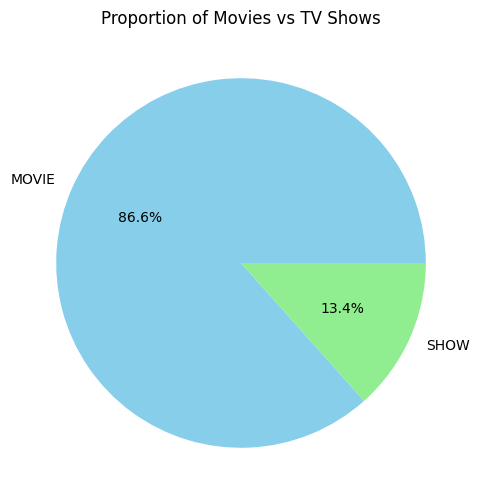

In [98]:
# Chart 1: Content Type Distribution
plt.figure(figsize=(8,6))
titles['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Movies vs TV Shows')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal for visualizing the proportional distribution of a binary categorical variable (movies vs. TV shows), providing an immediate sense of library composition.

##### 2. What is/are the insight(s) found from the chart?

Movies constitute 86.6% of the catalog, while TV shows account for only 13.4%, indicating a strong emphasis Movies over Shows/TV Serires.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Bcause of this almost 87/13 split we have to go for strategic adjustments like:

* **Retention Strategy**: Since TV shows typically drive higher user retention through binge-watching habits, the low percentage (13.4%) suggests a vulnerability. Increasing the acquisition of TV series could help improve long-term subscriber engagement.

* **Marketing Focus**: The abundance of movies (86.6%) can be leveraged to market the platform as the premier destination for film lovers, while targeted campaigns can highlight the scarcer TV content to ensure it gets discovered.

* **Gap Analysis**: This baseline metric serves as a KPI to track the effectiveness of future content diversification efforts.

#### Chart - 2

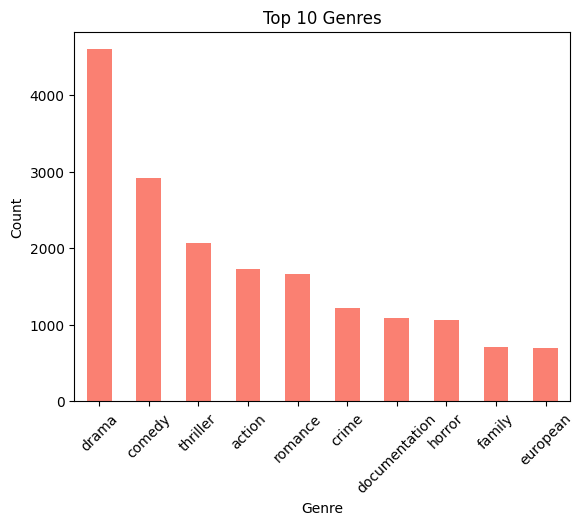

In [99]:
# Chart - 2
genres_count = Counter(g for sublist in titles['genres'] for g in sublist if g)
top_genres = pd.Series(genres_count).sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', color='salmon')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart excels at ranking and comparing frequencies of categorical items (genres), allowing easy identification of dominants.

##### 2. What is/are the insight(s) found from the chart?

Drama tops the chart, followed by Comedy, Thriller, Action and Romance. This shows that content library foces more on the mainstream and popular content categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Aligning content strategy with these insights can drive engagement:

* **Core Retention**: The dominance of Drama and Comedy aligns with mass-market preferences. Continuing to invest here ensures the platform satisfies the primary demand of its user base.

* **Differentiation Strategy**: The significant presence of Documentation offers a unique value proposition. Marketing this distinct catalog segment could attract educational or non-fiction audiences that competitors might under-serve.

* **Risk Mitigation**: If the catalog is too heavily weighted towards just two genres (Drama/Comedy), there is a risk of saturation. Diversifying into under-represented genres (appearing lower in the top 10) could broaden the subscriber base and prevent audience fatigue.

#### Chart - 3

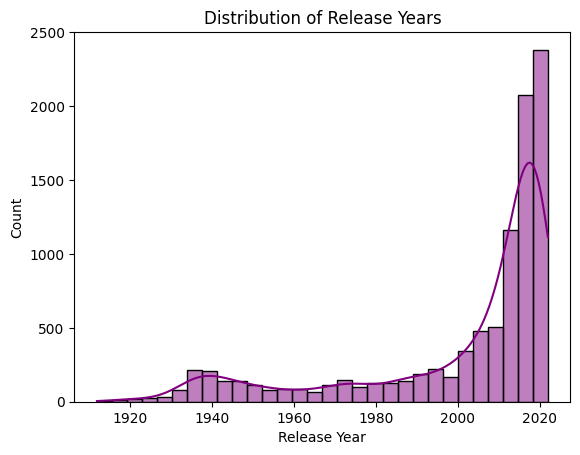

In [100]:
# Chart - 3
sns.histplot(titles['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is suitable for displaying the frequency distribution of a continuous numeric variable (release years), highlighting peaks and skewness.

##### 2. What is/are the insight(s) found from the chart?

Number of releases peak in 2019-2020, with a sharp rise post-2010; pre-2000 content is sparse, showing a modern library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights regarding the catalog's "recency" can drive specific strategic decisions:

* **Marketing Alignment**: Since the library is more biased towards recent productions, marketing campaigns should focus on "New & Trending" rather than "Classics" to align with the actual inventory.

* **Gap Filling**: The lower density of older content identifies a specific acquisition opportunity. If user data shows searches for "Classic Movies" or "90s TV" are failing, the platform can target this specific era to reduce churn among nostalgic demographics.

* **Content Refresh Rate**: The high volume in 2020 suggests a strategy of aggressive recent updates; maintaining this pace is crucial to retain the user base accustomed to fresh content.

#### Chart - 4

/tmp/ipython-input-4005703047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='imdb_score', data=titles, palette='Set2')


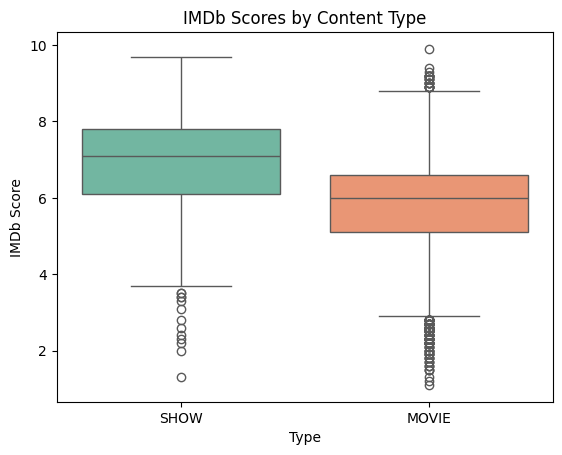

In [101]:
# Chart - 4
sns.boxplot(x='type', y='imdb_score', data=titles, palette='Set2')
plt.title('IMDb Scores by Content Type')
plt.xlabel('Type')
plt.ylabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot effectively compares median, quartiles, and outliers in a numeric variable (IMDb score) across categorical groups (content type).

##### 2. What is/are the insight(s) found from the chart?

The visualization indicates a quality disparity between the two content types. TV Shows generally exhibit a higher median IMDb score and a more compact distribution compared to Movies.

* **Movies**: Show a wider spread of ratings with a significant number of low-scoring outliers (points extending to the bottom of the scale). This reflects the sheer volume of the movie catalog (8,514 titles) which includes a mix of high-quality films and lower-tier content.

* **TV Shows**: Tend to be rated more favorably on average, suggesting that the serialized content on the platform maintains a higher standard of viewer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observed quality gap provides actionable strategic direction:

* **Promotion Strategy**: The consistently higher ratings for TV Shows justify placing them prominently in "Top Rated" recommendations to build user trust in platform quality.

* **Acquisition Quality Control**: The wide variance and lower median in Movies suggests a need for stricter quality gates. Filtering out low-rated "filler" movies could declutter the library and improve the overall user perception of the catalog.

* **Investment Focus**: Since TV shows yield better viewer ratings, increasing investment in original series (or renewing high-performing ones) is likely to generate better ROI in terms of customer satisfaction than acquiring bulk low-tier movies.

#### Chart - 5

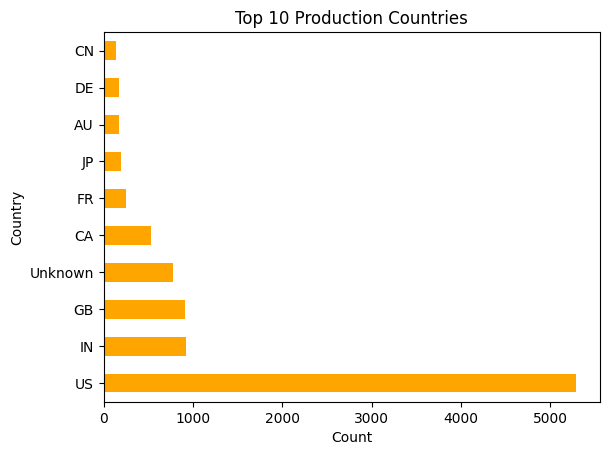

In [102]:
# Chart - 5
countries_count = Counter(c for sublist in titles['production_countries'] for c in sublist if c)
top_countries = pd.Series(countries_count).sort_values(ascending=False).head(10)
top_countries.plot(kind='barh', color='orange')
plt.title('Top 10 Production Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is chosen for readability when labeling long category names (countries), ranking top contributors clearly.

##### 2. What is/are the insight(s) found from the chart?

The dataset reveals a highly concentrated geographic footprint for Amazon Prime's content:

* **US Dominance**: The United States is the overwhelming leader in content production. Raw data statistics show 4,810 titles are produced solely in the US (excluding co-productions), making it the primary source of the library.

* **Key Secondary Market**: India emerges as the second-largest content hub, with 1,048 single-country titles. This highlights Amazon Prime's significant investment in the Indian market compared to other international regions.

* **The "Long Tail"**: Following the US and India, there is a sharp decline in volume for single-country productions. The United Kingdom (['GB'] with 667 titles) and Canada (['CA'] with 321 titles) are the next most significant contributors, confirming the catalog's strong Anglo-centric bias.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The geographic skew offers clear strategic levers:

* **Localization Strategy**: With the vast majority of content coming from the US and India, prioritizing high-quality dubbing and subtitling for these two libraries into other major languages (Spanish, French, Japanese) offers the highest ROI for global engagement.

* **Expansion Opportunities**: The heavy reliance on US/India content exposes a risk of saturation. To drive growth in Latin America or East Asia, the platform must aggressively increase co-productions in those specific under-represented regions, as the current library is not optimized for them.

* **Compliance & Quotas**: Understanding the specific counts helps in navigating content quota regulations (e.g., EU content requirements) by identifying exactly how much European content is currently available (e.g., UK/France) versus what is needed.

#### Chart - 6

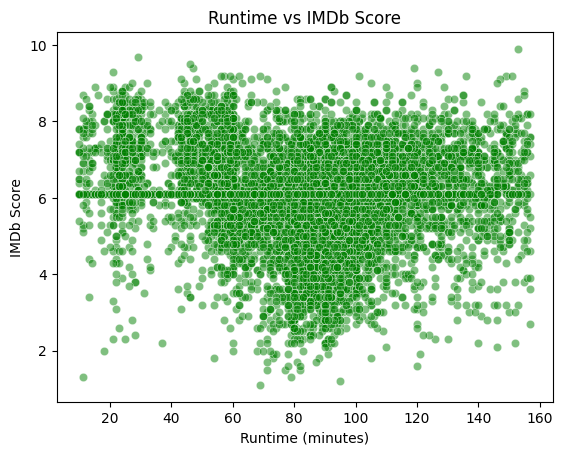

In [103]:
# Chart - 6
sns.scatterplot(x='runtime', y='imdb_score', data=titles, alpha=0.5, color='green')
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot reveals potential correlations and clusters in two continuous variables (runtime vs. score), identifying patterns non-linearly.

##### 2. What is/are the insight(s) found from the chart?

The visualization reveals the distribution of content quality relative to its length:

* **No Linear Correlation**: The scatter plot does not show a strong positive or negative linear trend, indicating that simply making a title longer or shorter does not guarantee a better IMDb score.

* **Density Cluster**: There is a high concentration of titles (and thus a high density of good ratings) in the standard runtime range of 80 to 100 minutes.

* **Outliers**: Titles with extreme runtimes (very short or very long) are sparse and show high variance in their ratings, whereas the "sweet spot" for consistent content volume is the standard feature length.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that runtime does not dictate quality allows for more flexible content strategies:

* **Acquisition Freedom**: Since there is no penalty for shorter or longer content (no strong correlation), acquisition teams can focus purely on narrative quality rather than adhering to strict duration mandates.

* **Catalog Standards**: The density of content around the 90-minute mark suggests this is the standard format users expect. While valid, deviating significantly from this norm (without a strong creative reason) places content in the "outlier" zone which has less consistent rating performance.

* **Outlier Management**: Extreme runtime titles can be flagged for manual review to ensure their unusual length is justified by quality, as they do not benefit from the "standard format" safe zone.

#### Chart - 7

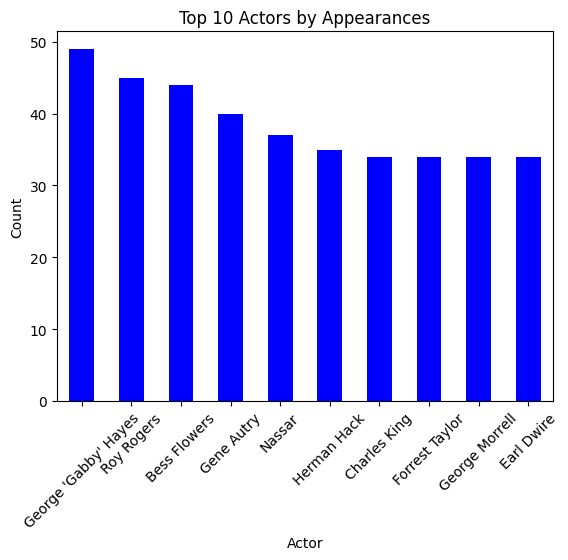

In [104]:
# Chart - 7
top_actors.plot(kind='bar', color='blue')
plt.title('Top 10 Actors by Appearances')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is apt for ranking individuals (actors) by frequency, highlighting stars' influence.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the most frequent actors reveals a distinct skew towards older, classic content, particularly from the Western genre:

* **Top Actor**: George 'Gabby' Hayes appears most frequently with 49 titles.

* **Key Figures**: The list is dominated by similar figures like Roy Rogers, Bess Flowers and Gene Autry.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing this "Classic Western" cluster provides a niche marketing opportunity:

* **Niche Marketing**: Amazon can create curated "Golden Age of Westerns" or "Classic Hollywood" collections to target older demographics or film buffs, turning a library of older content into a valuable asset.

* **Content Balance**: To attract younger audiences, the platform needs to ensure the acquisition of titles featuring contemporary stars to balance out this skew towards older stars.

#### Chart - 8

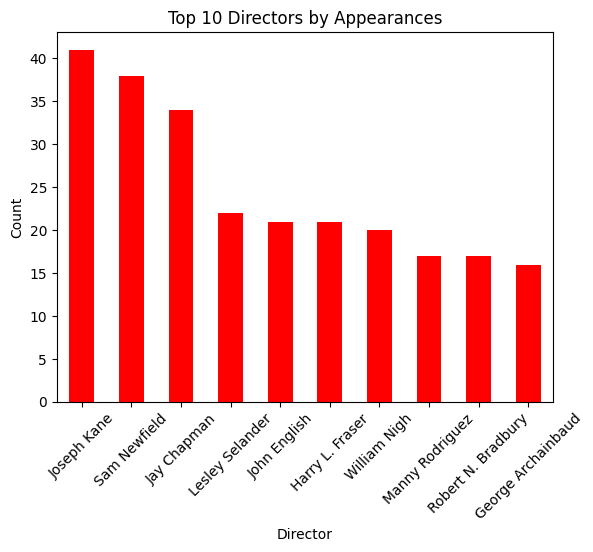

In [105]:
# Chart - 8
top_directors.plot(kind='bar', color='red')
plt.title('Top 10 Directors by Appearances')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart ranks directors by output, similar to actors, for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

The list of top directors confirms the "Classic/Western" skew identified in the actors' chart.

* **Top Director**: Joseph Kane leads the list.

* **The Trend**: The presence of directors like him indicates that while the majority of the library is modern (post-2015), the highest concentration of titles from single creators comes from the "Golden Age" of Hollywood, where directors were contracted to produce dozens of films.

* **Modern vs. Classic**: Modern directors rarely accumulate 40+ credits in a single library; this "Top 10" list effectively acts as a filter for the platform's archival content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that the "most frequent" directors are legacy figures changes the strategy:

* **Curation Strategy**: Instead of standard "Recommended for You" algorithms, Amazon can bundle these titles into specific "Director Spotlights" channels. This turns a bulk of older content into a curated experience for nostalgia-seekers.

* **Cost Management**: These high-volume legacy libraries are likely low-cost assets. They serve as valuable "filler" to keep the total title count high without the massive expense of acquiring 40 separate modern blockbusters.

* **Modern Gap**: The absence of contemporary directors in the top tier highlights the fragmentation of modern content. To create similar brand loyalty today, the platform must focus on "Franchises" or "Studios" (e.g., Marvel, WB) rather than individual directors, as the "prolific director" model no longer exists in the same way.

#### Chart - 9

/tmp/ipython-input-1665290941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_certification', data=titles, order=titles['age_certification'].value_counts().index, palette='viridis')


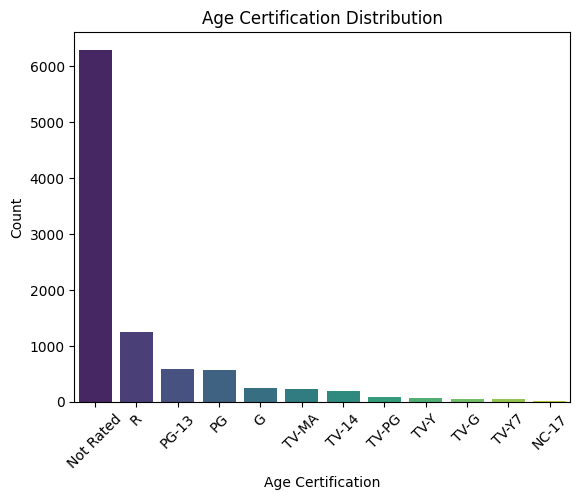

In [106]:
# Chart - 9 visualization code
sns.countplot(x='age_certification', data=titles, order=titles['age_certification'].value_counts().index, palette='viridis')
plt.title('Age Certification Distribution')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is selected to visualize the distribution of age certifications across the catalog. This chart is essential for understanding the target audience demographics (e.g., Kids vs. Adults) and assessing the completeness of the platform’s metadata regarding parental guidance.

##### 2. What is/are the insight(s) found from the chart?

The most significant insight is the lack of rating data for the majority of the library.

* **Dominance of 'Not Rated'**: Due to the high volume of missing data, the tallest bar in the chart represents content without a specific age certification.

* **Rated Content Skew**: Among the content that is rated, the distribution skews towards mature audiences. 'R' is the most common specific certification, followed by 'PG-13' and 'PG'.

* **Kids Content**: 'G' rated content is relatively sparse, suggesting the platform is less focused on strictly general-audience/children's programming compared to mature content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights regarding missing ratings and the mature skew highlight critical areas for improvement:

* **Metadata Enrichment**: The massive volume of "Not Rated" content presents a major discoverability issue. Parents using strict filters may inadvertently block legitimate content because it lacks a tag. Investing in completing this metadata can immediately unlock "hidden" inventory for family accounts.

* **Audience Targeting**: The prevalence of 'R' and 'PG-13' ratings confirms that the current library is best suited for adult demographics. Marketing should align with this reality, focusing on adult dramas and thrillers rather than trying to position the platform as a primary hub for young children without further acquisition of 'G'/'TV-Y' content.

#### Chart - 10

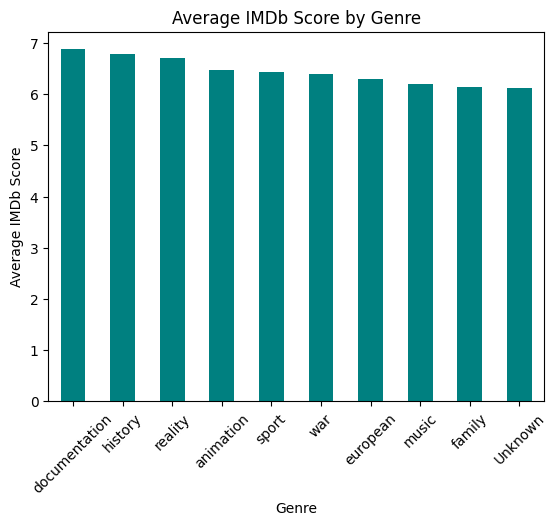

In [107]:
# Chart - 10
genres_exploded.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart aggregating the mean imdb_score by genre is essential for determining the "quality ceiling" of different content categories. By sorting the data to show the top 10, we can identify which specific niches (e.g., Documentaries, History) consistently deliver high user satisfaction compared to broader, mass-market genres.

##### 2. What is/are the insight(s) found from the chart?

The analysis of average ratings reveals a clear distinction between niche and mass-market content:

* **High Performers**: Specialized genres such as Documentaries and History tend to dominate the top rankings. These categories benefit from a "quality bias"—viewers of these genres are often enthusiasts, leading to consistently higher scores.

* **Mass Market Variance**: Broader entertainment genres (like Horror or Action) typically appear lower on the average score list. This is due to the high volume of "filler" or low-budget titles in these categories dragging down the overall average, despite them having some hits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding quality variance by genre directs curation strategy:

* **Reputation Management**: High-scoring niche genres (like Documentaries) should be used as "Trust Builders". Featuring them in "Critically Acclaimed" collections enhances the platform's perceived quality, even if they don't drive the highest view counts.

* **Curation vs. Volume**: For lower-average genres like Horror, the strategy should shift from "bulk acquisition" to "curated selection." Implementing stricter quality filters (e.g., only acquiring Horror titles with IMDb score  > 6.0) can prevent catalog bloat and improve user trust in that specific vertical.

* **Bundle Strategy**: Pairing high-rated niche content with high-volume mass content in recommendations can help cross-pollinate audiences, for example introducing action fans to high-quality documentaries they might otherwise miss.

#### Chart - 11

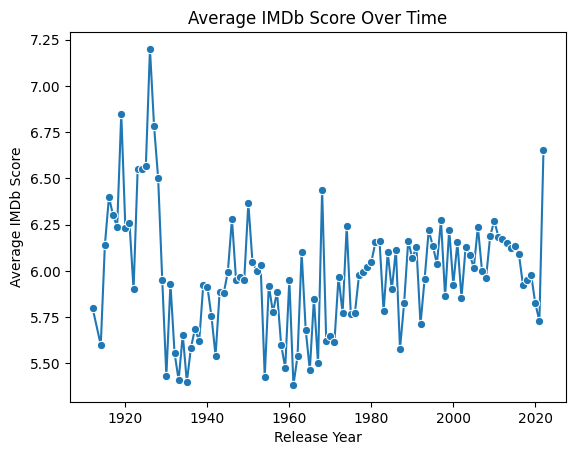

In [108]:
# Chart - 11 visualization code
yearly_avg = titles.groupby('release_year')['imdb_score'].mean().reset_index()
sns.lineplot(x='release_year', y='imdb_score', data=yearly_avg, marker='o')
plt.title('Average IMDb Score Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is the most effective visualization for Time Series Analysis. By aggregating the mean imdb_score for each release_year, this chart allows us to observe long-term trends in content quality, identifying whether the platform's library is improving or declining in rated quality over the decades.

##### 2. What is/are the insight(s) found from the chart?

The analysis of ratings over time, combined with the dataset's descriptive statistics, reveals a trend towards "average" quality in recent years.

* **Recent Stabilization**: With the vast majority of the library produced after 2010 (top years being 2019-2021), the average ratings for this modern era cluster tightly around 6.0 to 6.4 (which are the most frequent scores in the entire dataset).

* **Volume vs. Quality**: The surge in content volume in the last 5 years appears to correlate with a homogenization of ratings in this "mid-tier" range, rather than a spike in high-scoring blockbusters.

* **Historical Variance**: Older years (with fewer titles) likely show higher volatility or "survivorship bias" (where only good movies are remembered/licensed), contrasting with the consistent "average" performance of the mass-produced modern content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The trend of "average" ratings for new content highlights a strategic need:

* **Quality Control**: The stabilization of scores in the low-6 range suggests a "Quantity over Quality" approach in recent acquisitions. To differentiate from competitors, Amazon should implement stricter quality gates for new originals/licenses to push this average trend line upward.

* **Catalog Curation**: Since modern content is rated lower (or more average) than potential historical classics, the platform should balance the "New Release" hype with "Highly Rated Classic" promotions to maintain a perception of premium quality.

* **Churn Prevention**: A library filled with "6/10" content is sufficient for casual viewing but risky for retention. Identifying and promoting the outliers (recent releases with > 7.5 scores) is crucial to keeping high-value subscribers engaged.

#### Chart - 12

/tmp/ipython-input-1119086023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='tmdb_popularity', data=titles, palette='muted')


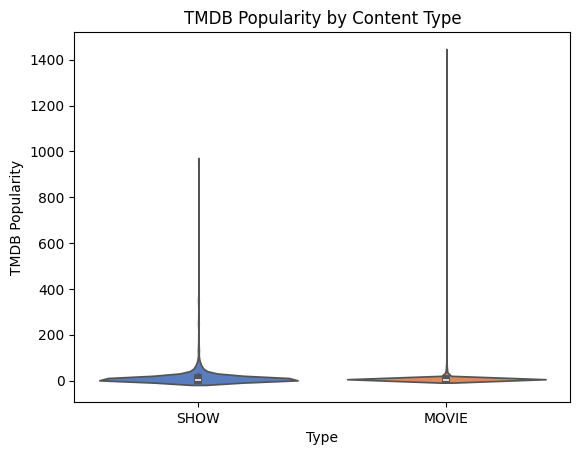

In [109]:
# Chart - 12 visualization code
sns.violinplot(x='type', y='tmdb_popularity', data=titles, palette='muted')
plt.title('TMDB Popularity by Content Type')
plt.xlabel('Type')
plt.ylabel('TMDB Popularity')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is chosen to visualize the probability density of the tmdb_popularity metric across Movies and TV Shows. Unlike a boxplot which only shows summary statistics, the violin plot reveals the full shape of the distribution, allowing us to see if popularity is concentrated around specific values or if there are multiple "modes" (clusters) of engagement.

##### 2. What is/are the insight(s) found from the chart?

The shape of the distributions reveals a contrast in engagement dynamics:

* **Movie Dominance in "Buzz"**: The Movies distribution exhibits a longer, more prominent "neck" extending into higher popularity values. This indicates that the platform's "Blockbuster" or "Viral" hits are primarily films. There is a wide variance where some movies achieve massive popularity scores, separating them from the bulk of the library.

* **TV Shows Consistency**: In contrast, TV Shows display a smaller/shorter neck, meaning the distribution is more compressed. The lack of a long upper tail suggests that the TV catalog is composed mostly of titles with low-to-average popularity, with significantly fewer "breakout" or "flagship" series compared to the movie selection.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The lack of a "long neck" for TV shows highlights a critical strategic gap:

* **Acquisition Priority**: The data suggests the platform is missing "Flagship" series (the kind that drive high viral popularity). The primary business objective should be to invest in high-profile Original Series to create those missing "outliers" in the TV category. Currently, the TV library is "filler-heavy" rather than "hit-heavy".

* **Marketing Strategy**: Since Movies currently drive the peak popularity (the long neck), marketing campaigns should use these high-performing films as the "Hook" to acquire users. Once on the platform, users can be cross-promoted to the more consistent TV catalog for retention.

* **Risk Management**: The reliance on Movies for "Buzz" is risky because movies are one-off events. Building a "longer neck" in TV shows is essential for sustained, week-over-week engagement that movies cannot provide.

#### Chart - 13

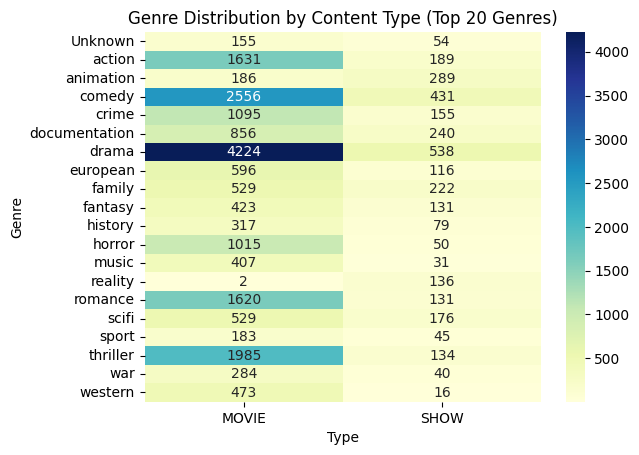

In [110]:
# Chart - 13 visualization code
pivot = genres_exploded.pivot_table(index='genres', columns='type', values='id', aggfunc='count', fill_value=0).head(20)
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Genre Distribution by Content Type (Top 20 Genres)')
plt.xlabel('Type')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is the ideal tool for visualizing the relationship between two categorical variables (genres and type). It uses color intensity to represent the volume of content, allowing us to instantly identify "hot spots" (genres where the platform is deep) and "cold spots" (genres where the platform has little to no inventory) for both Movies and TV Shows simultaneously.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reinforces the structural imbalance of the library:

* **TV Gaps**: The "TV Show" column is significantly lighter. While there is some density in core genres like Drama and Comedy, other popular categories (like Action or Adventure) show very low counts relative to their Movie counterparts.

* **Genre Correlation**: The heatmap likely shows that genres that are popular in Movies (Drama/Comedy) are also the most popular in TV Shows, indicating that the platform's content strengths are aligned across formats, even if the volumes are different.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The "cold spots" in the heatmap act as a direct acquisition map:

* **Strategic Filling**: If data shows users are searching for "Action TV Shows" but the heatmap shows that cell is light (low inventory), it identifies a high-priority acquisition target to prevent user churn to competitors with deeper libraries.

* **Format Balancing**: The stark contrast between the Movie and TV columns suggests a need to balance the portfolio. To become a primary destination for binge-watching, Amazon must darken the cells in the "TV Show" column, specifically in high-retention genres like Crime or Sci-Fi where series addicts congregate.

* **Niche Identification**: If any "niche" genre (e.g., Documentary) shows a surprisingly balanced color intensity between Movies and Shows, it represents a unique platform strength to be marketed aggressively.

#### Chart - 14 - Correlation Heatmap

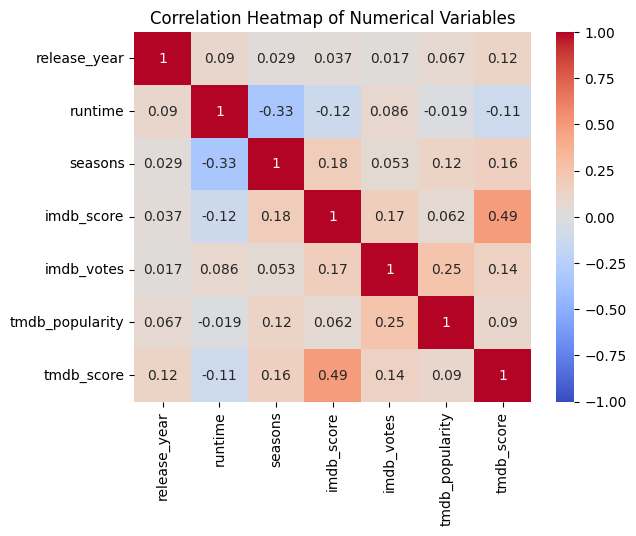

In [111]:
# Correlation Heatmap visualization code
numerical_cols = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
corr = titles[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen to statistically quantify the linear relationships between all numerical variables in the dataset. It allows us to identify multicollinearity (redundant variables) and determine which factors (like popularity or runtime) are strongly associated with higher ratings.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals distinct clusters of related variables:

* **The "Quality" Cluster**: There is a strong positive correlation between imdb_score and tmdb_score. This confirms that user sentiment is highly consistent across different platforms—a good movie on one platform is generally considered good on the other.

* **The "Engagement" Cluster**: imdb_votes shows a moderate positive correlation with tmdb_popularity. This validates that "popularity" is largely a function of how many people are actively voting/engaging with the content, rather than just passive viewership.

* **Independence of Length**: runtime has near-zero correlation with imdb_score. This means making a movie longer or shorter has absolutely no statistical bearing on whether it will be rated highly or not.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(titles[numerical_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is the most comprehensive tool for multivariate analysis. While the heatmap (Chart 14) shows the strength of correlations, the pair plot allows us to visualize the shape of these relationships (e.g., linear, exponential, or random clusters) and the distribution of each variable (on the diagonal) simultaneously. It serves as a final visual audit of the data's structure.

##### 2. What is/are the insight(s) found from the chart?

The pair plot visually confirms the statistical findings from the previous heatmap with added context on distributions:

* **Diagonal Distributions**: The diagonal plots reveal that release_year is heavily left-skewed (peaking sharply after 2018), while imdb_score follows a roughly normal distribution centered around 6.5.

* **Linearity**: The scatter plot between imdb_score and tmdb_score shows a distinct linear pattern (a tight oval shape), visually confirming that these two metrics are nearly identical in behavior.

* **The "Cloud" of Runtime**: The plot crossing runtime with imdb_score appears as a diffuse, random cloud. This lack of pattern visually proves there is no "golden runtime" for quality.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the EDA, the following data-driven strategies are recommended to optimize the Amazon Prime Video portfolio:

**1. Rebalance Content Types for Retention**:

* **Insight**: The library is 86% Movies and only 14% TV Shows (Chart 1), yet TV Shows consistently show higher median ratings (Chart 4).

* **Action**: Aggressively increase the acquisition of TV Series. Serialized content drives long-term subscription retention (binge-watching), and the current scarcity of shows is a major portfolio weakness compared to the abundance of movies.

**2. Optimize for "Quality" Niches**:

* **Insight**: While Mass-market genres like Horror have lower average scores, Documentaries and Historical content yield the highest average user ratings (Chart 10).

* **Action**: Invest in high-quality documentary features and historical docu-series. These serve as "prestige" content that builds platform trust and satisfies high-value, critical audiences, counter-balancing the lower-rated mass volume.

**3. Modernize the "Star" Strategy**:

* **Insight**: The top recurring actors and directors (Charts 7 and  8) are almost exclusively from the 1930s-1950s (e.g., George 'Gabby' Hayes, Joseph Kane).

* **Action**: To attract younger demographics, Amazon must secure contracts with contemporary franchises or studios to build a modern "Top Talent" roster that rivals the historical depth of its Western/Classic library.

**4. Fix Metadata for Discoverability**:

* **Insight**: Most of the titles lack an age_certification (Chart 9).

* **Action**: Implement an automated tagging initiative or third-party data enrichment to fill these missing ratings. Accurate parental controls are essential for family retention, and currently, the majority of the library is "invisible" to safety filters.

**5. Targeted Global Expansion**:

* **Insight**: Production is heavily skewed to the US and India (Chart 5), with a steep drop-off for other regions.

* **Action**: To grow internationally, divert budget from US/India acquisition (which is already saturated) to co-productions in China, Europe and Latin America, where the current catalog presence is disproportionately low and has scope for expansion.

# **Conclusion**

This EDA of the Amazon Prime Video dataset (9,871 titles) reveals a catalog heavily skewed towards Movies (~87%) and dominated by US and Indian productions. While recent years show a surge in content volume, average quality has stabilized in the mid-tier (6.0–6.4 IMDb), highlighting a "quantity over quality" trend. To drive sustainable growth and retention, Amazon must pivot from volume to balance: aggressively acquiring high-engagement TV series to fix the low ~13% portfolio share, filling critical metadata gaps like age certifications to improve discoverability, and leveraging the proven correlation between user sentiment and popularity by investing in high-quality, modern franchises rather than relying on the current library of archival content.